In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

In [3]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=20
Period for indexes: 1954-04-20 to 2024-04-20 


# Question 1

In [13]:
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [5]:
gdpc1.head()

,GDPC1
DATE,
1954-07-01,2880.482
1954-10-01,2936.852
1955-01-01,3020.746
1955-04-01,3069.910
1955-07-01,3111.379


In [11]:
gdpc1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278 entries, 1954-07-01 to 2023-10-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GDPC1         278 non-null    float64
 1   gdpc1_us_yoy  274 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB


In [14]:
# year-over-year (YoY) growth rate
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1.tail()

,GDPC1,gdpc1_us_yoy
DATE,,
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


In [15]:
# Average YoY growth in 2023

gdpc1_2023 = gdpc1.loc['2023-01-01':'2023-12-31']
avg_2023 = gdpc1_2023['gdpc1_us_yoy'].mean()
print(f"The 2023 average gdpc1_us_yoy is: {avg_2023*100:.1f}%")

The 2023 average gdpc1_us_yoy is: 2.5%


# Question 2

In [47]:
start = date(year=2000, month=1, day=2)
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)

In [36]:
dgs2.head()

,DGS2
DATE,
2024-01-02,4.33
2024-01-03,4.33
2024-01-04,4.38
2024-01-05,4.40
2024-01-08,4.36


In [37]:
dgs10.tail()

,DGS10
DATE,
2024-04-12,4.50
2024-04-15,4.63
2024-04-16,4.67
2024-04-17,4.59
2024-04-18,4.64


In [48]:
merged_df = dgs10.join(dgs2, how='left')
merged_df['dgs10-dgs2'] = merged_df['DGS10'] - merged_df['DGS2']
min_diff = min(merged_df['dgs10-dgs2'])

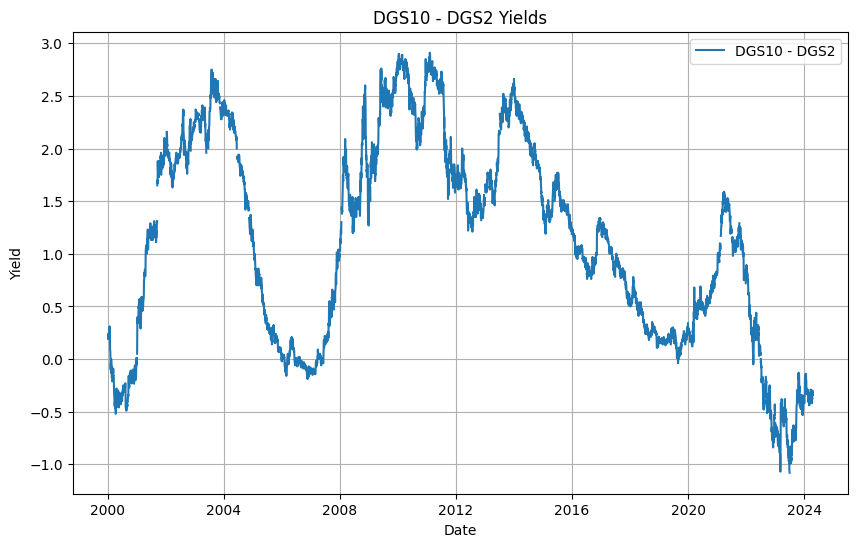

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['dgs10-dgs2'], label='DGS10 - DGS2')

plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('DGS10 - DGS2 Yields')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
print(f"the min value of (dgs10-dgs2) after since year 2000 is: {min_diff:.1f}")

the min value of (dgs10-dgs2) after since year 2000 is: -1.1


# Question 3

In [57]:
snp500_daily = yf.download(tickers = "^SPX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [58]:
ipx_mexico = yf.download(tickers = '^MXX',
                         period = 'max',
                         interval = '1d')

[*********************100%%**********************]  1 of 1 completed


In [70]:
snp500_end_price = snp500_daily.loc['2024-04-09']['Close']
snp500_start_price = snp500_daily.loc['2019-04-09']['Close']
ipx_end_price = ipx_mexico.loc['2024-04-09']['Close']
ipx_start_price = ipx_mexico.loc['2019-04-09']['Close']

In [71]:
snp500_ratio = round((snp500_end_price / snp500_start_price - 1) * 100)
ipx_ratio = round((ipx_end_price / ipx_start_price - 1) * 100)

In [72]:
print(max(snp500_ratio, ipx_ratio))

81


# Question 4

In [84]:
# Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023 for selected stocks

tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
ratio = {}

for ticker in tickers:
    data = yf.download(ticker, start='2023-01-01', end='2023-12-31', progress=False)
    min_price = min(data['Adj Close'])
    max_price = max(data['Adj Close'])
    res = round(((max_price - min_price) / max_price), 2)
    ratio[ticker] = res


In [85]:
ratio

{'2222.SR': 0.21,
 'BRK-B': 0.21,
 'AAPL': 0.37,
 'MSFT': 0.42,
 'GOOG': 0.39,
 'JPM': 0.28}

In [86]:
max(ratio.values())

0.42

# Question 5

In [103]:
# Find the largest dividend yield for the same set of stocks

tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
ratio = {}
for ticker in tickers:
  t = yf.Ticker(ticker)
  dividends = sum(t.dividends[t.dividends.index.year == 2023])
  data = yf.download(ticker, start='2023-01-01', end='2023-12-31', progress=False)
  last_trading_day = data.index[-1]
  adj_close_price = data.loc[last_trading_day, 'Adj Close']
  res = round(dividends / adj_close_price * 100, 1)
  ratio[t] = res

In [106]:
max(ratio.values())

2.8